<div style="background: url(background.jpeg) no-repeat;background-size:cover;
-webkit-mask-image:-webkit-gradient(linear, left top, left bottom, from(rgba(0,0,0,1)), to(rgba(0,0,0,0)));
      mask-image: linear-gradient(to bottom, rgba(0,0,0,1), rgba(0,0,0,0));
  height: 300px;
  width: 100%;
  border: solid 1px #000;
  box-sizing: border-box;
  ">

</div>
<h1 style="text-align:center;top:200px;left:0;right:0;position:absolute;font-weight:900;">Prediktivno Bankarstvo</h1>


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, log_loss, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from collections import Counter
from itertools import pairwise
from imblearn.combine import SMOTEENN

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
numerical = ['duration', 'campaign', 'pdays', 'previous', 'age',
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

objects = ['marital', 'education', 'housing', 'default', 'loan',
           'contact', 'month', 'day_of_week', 'poutcome', 'job']

In [9]:
for o in objects:
    print(o.capitalize() + ':\n', df[o].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Housing:
 ['no' 'yes' 'unknown']
Default:
 ['no' 'unknown' 'yes']
Loan:
 ['no' 'yes' 'unknown']
Contact:
 ['telephone' 'cellular']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Poutcome:
 ['nonexistent' 'failure' 'success']
Job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [10]:
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 12


In [11]:
df = df.drop_duplicates(keep=False)
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 0


<Axes: xlabel='y', ylabel='count'>

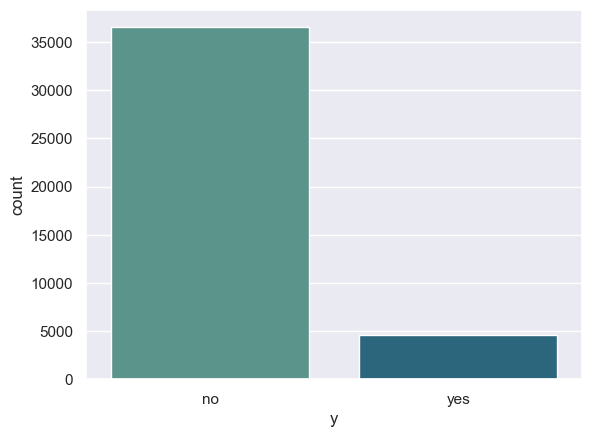

In [12]:
fig, ax = plt.subplots()

sns.countplot(x='y', data=df,
              palette=sns.color_palette("crest", 2))

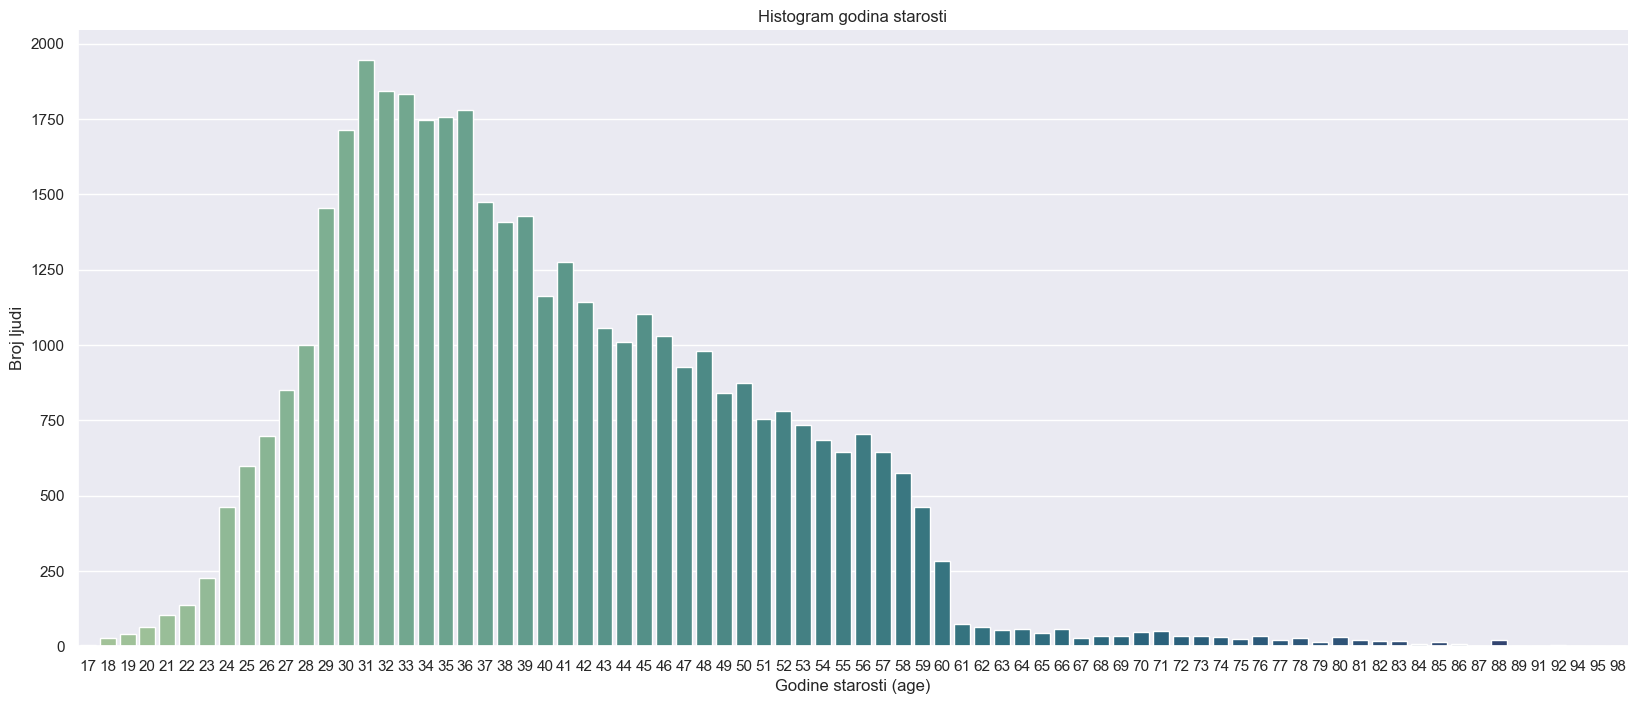

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df, palette="crest")
ax.set_xlabel('Godine starosti (age)')
ax.set_ylabel('Broj ljudi')
ax.set_title('Histogram godina starosti')
sns.despine()

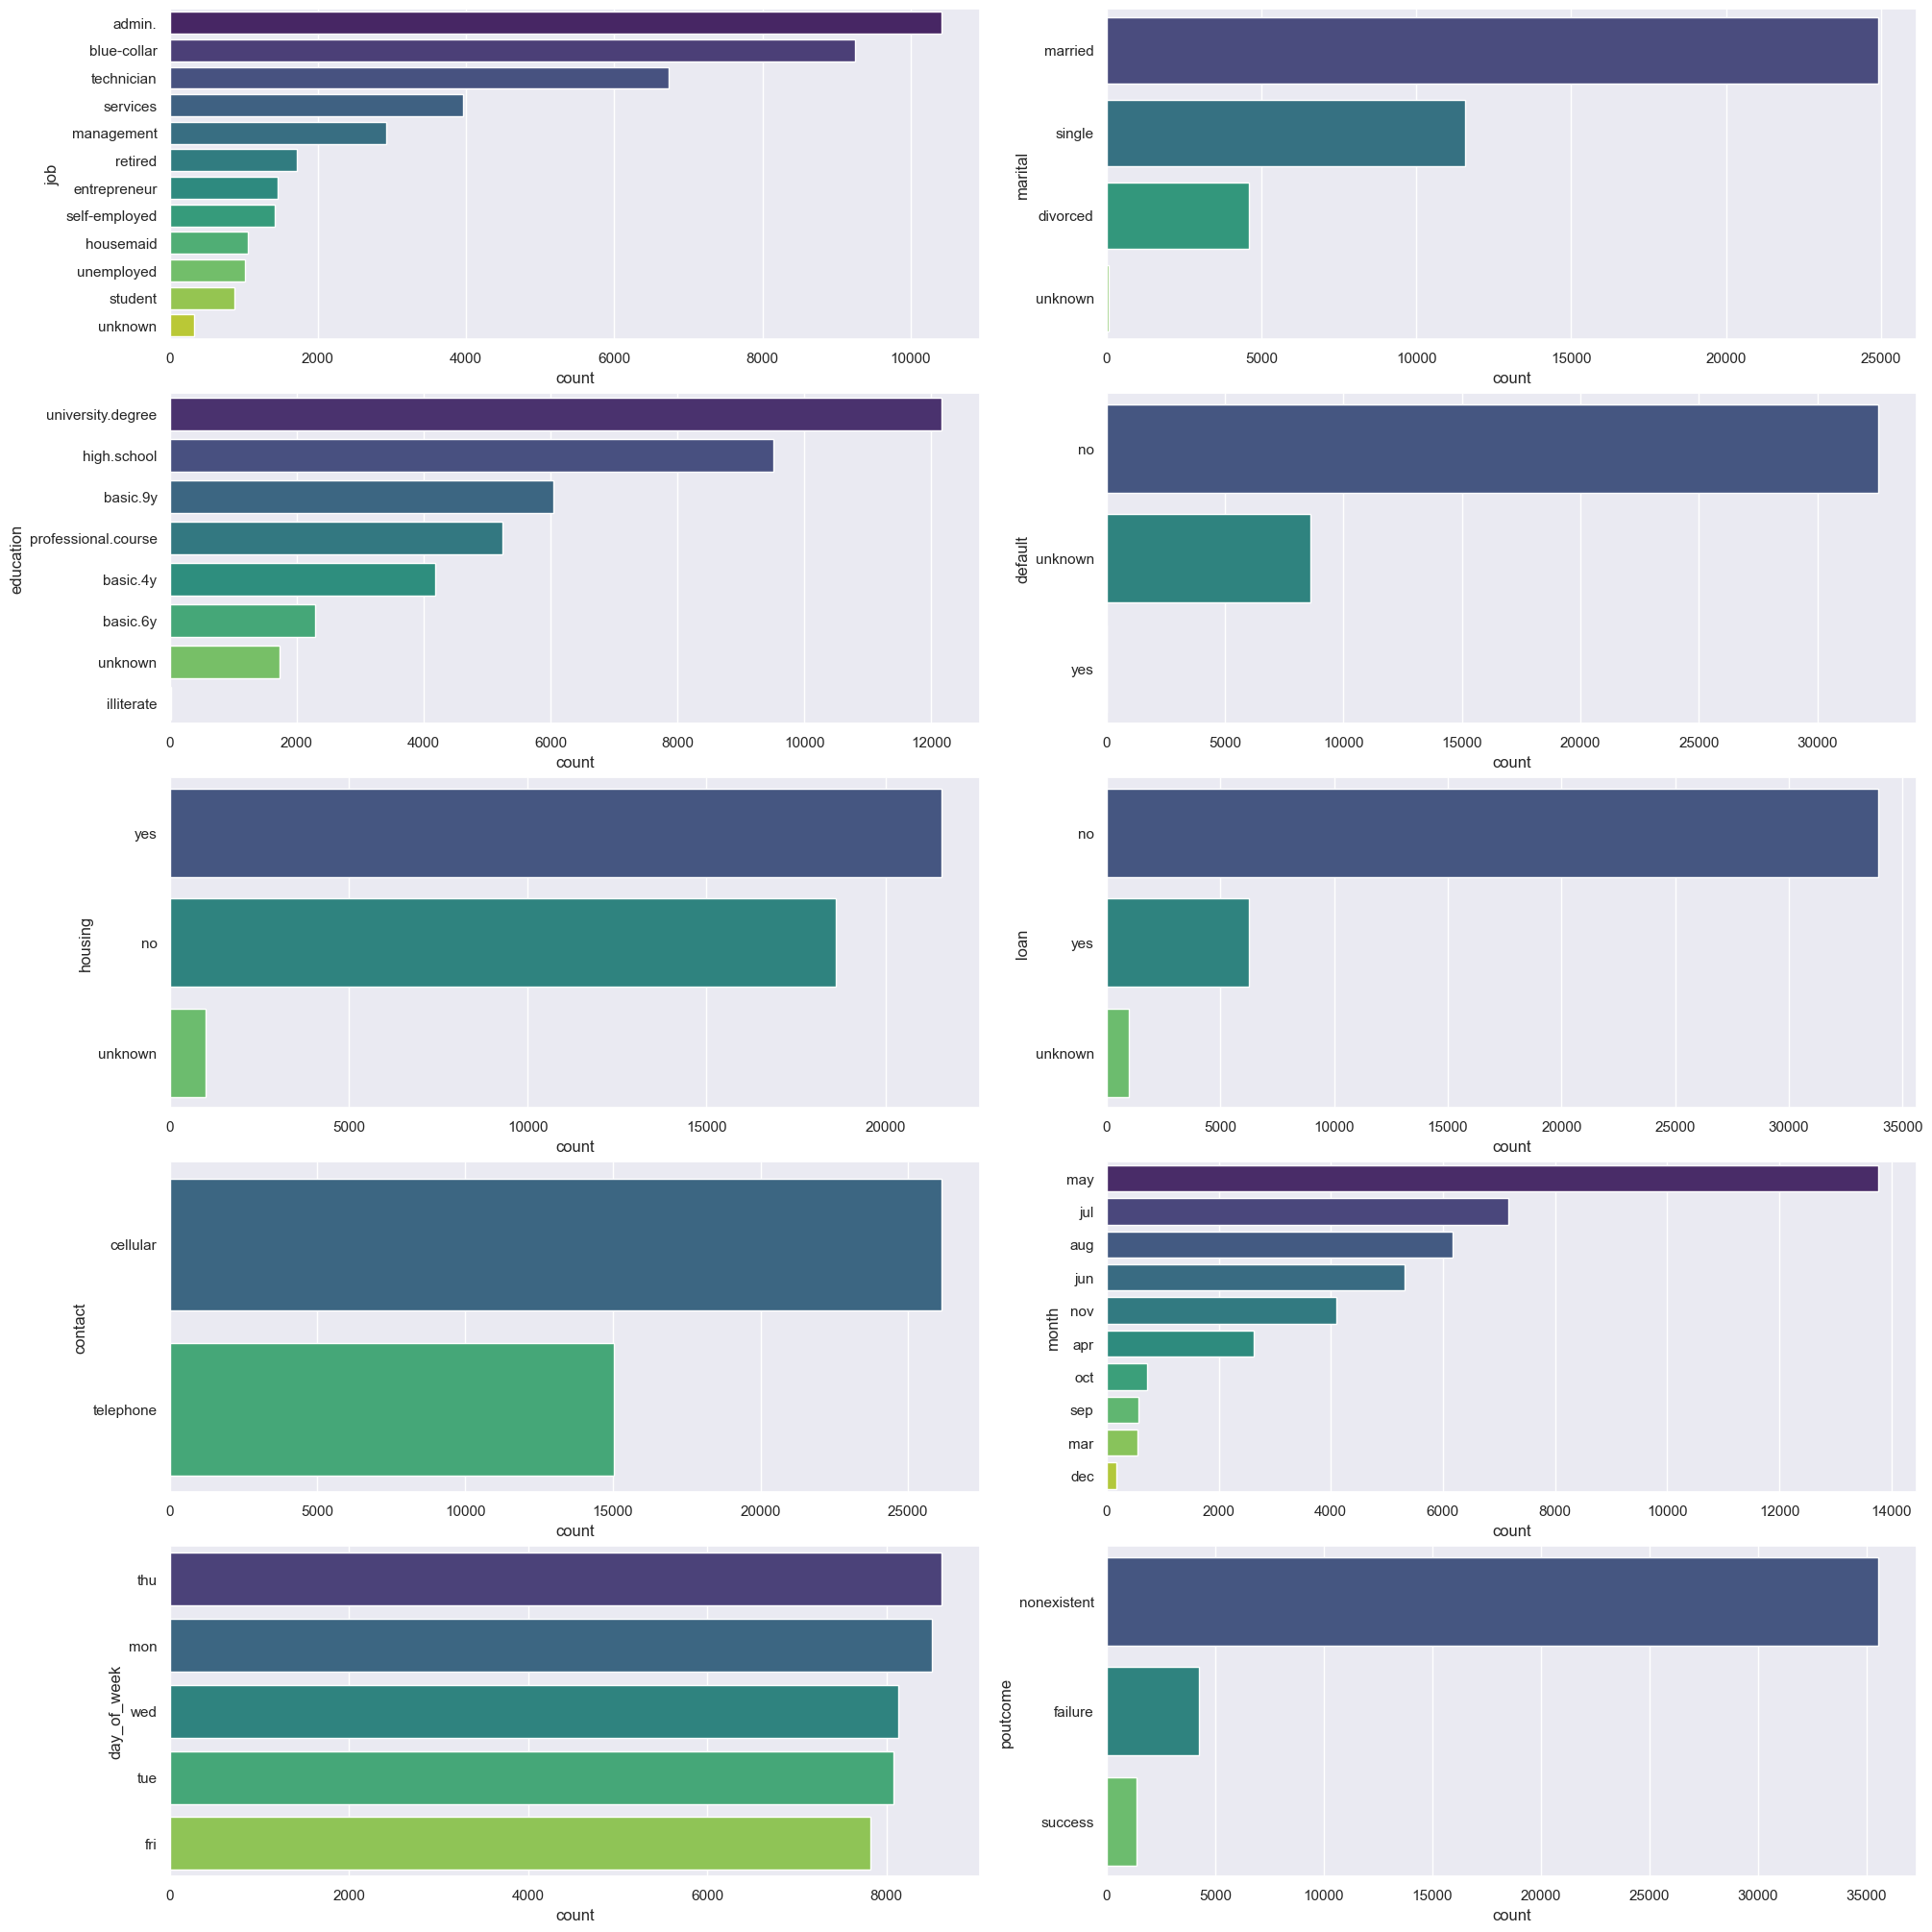

In [14]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical[:-1]):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')
    # KNN imputer

In [15]:
print("Education == illiterate:",
      df[df['education'] == 'illiterate'].shape, sep='')
print("Marital == unknown:", df[df['marital'] == 'unknown'].shape, sep='\t')
print("Default == yes:", df[df['default'] == 'yes'].shape, sep='\t\t')

Education == illiterate:(18, 21)
Marital == unknown:	(80, 21)
Default == yes:		(3, 21)


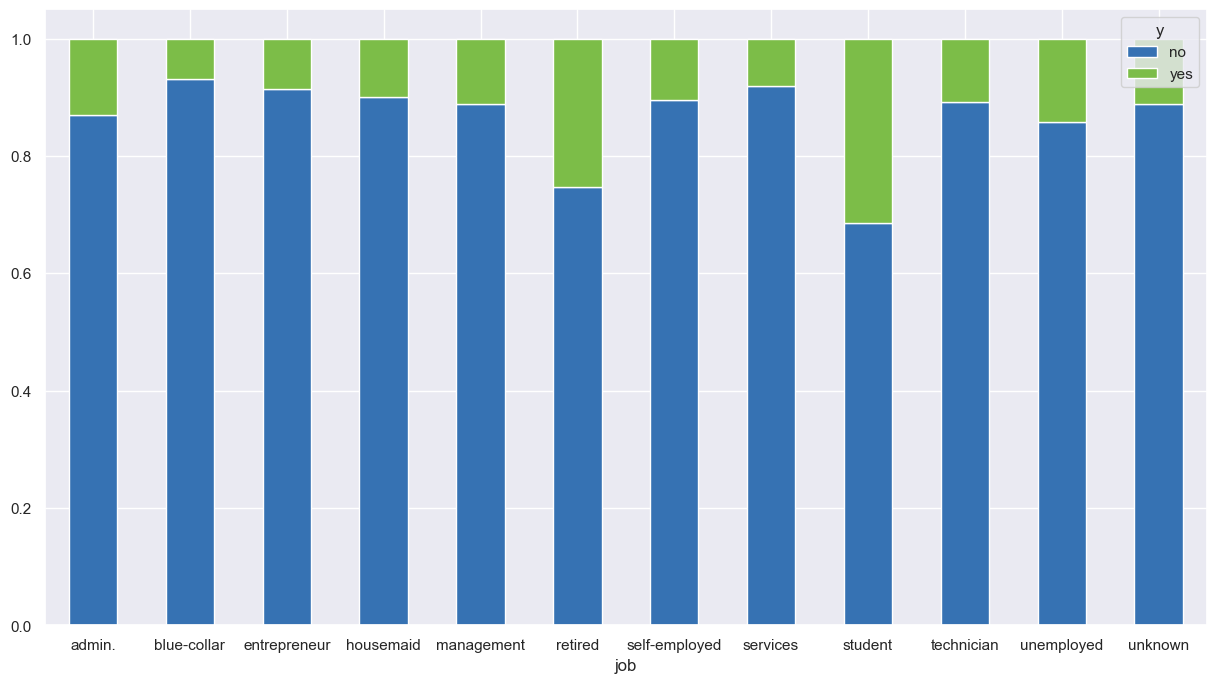

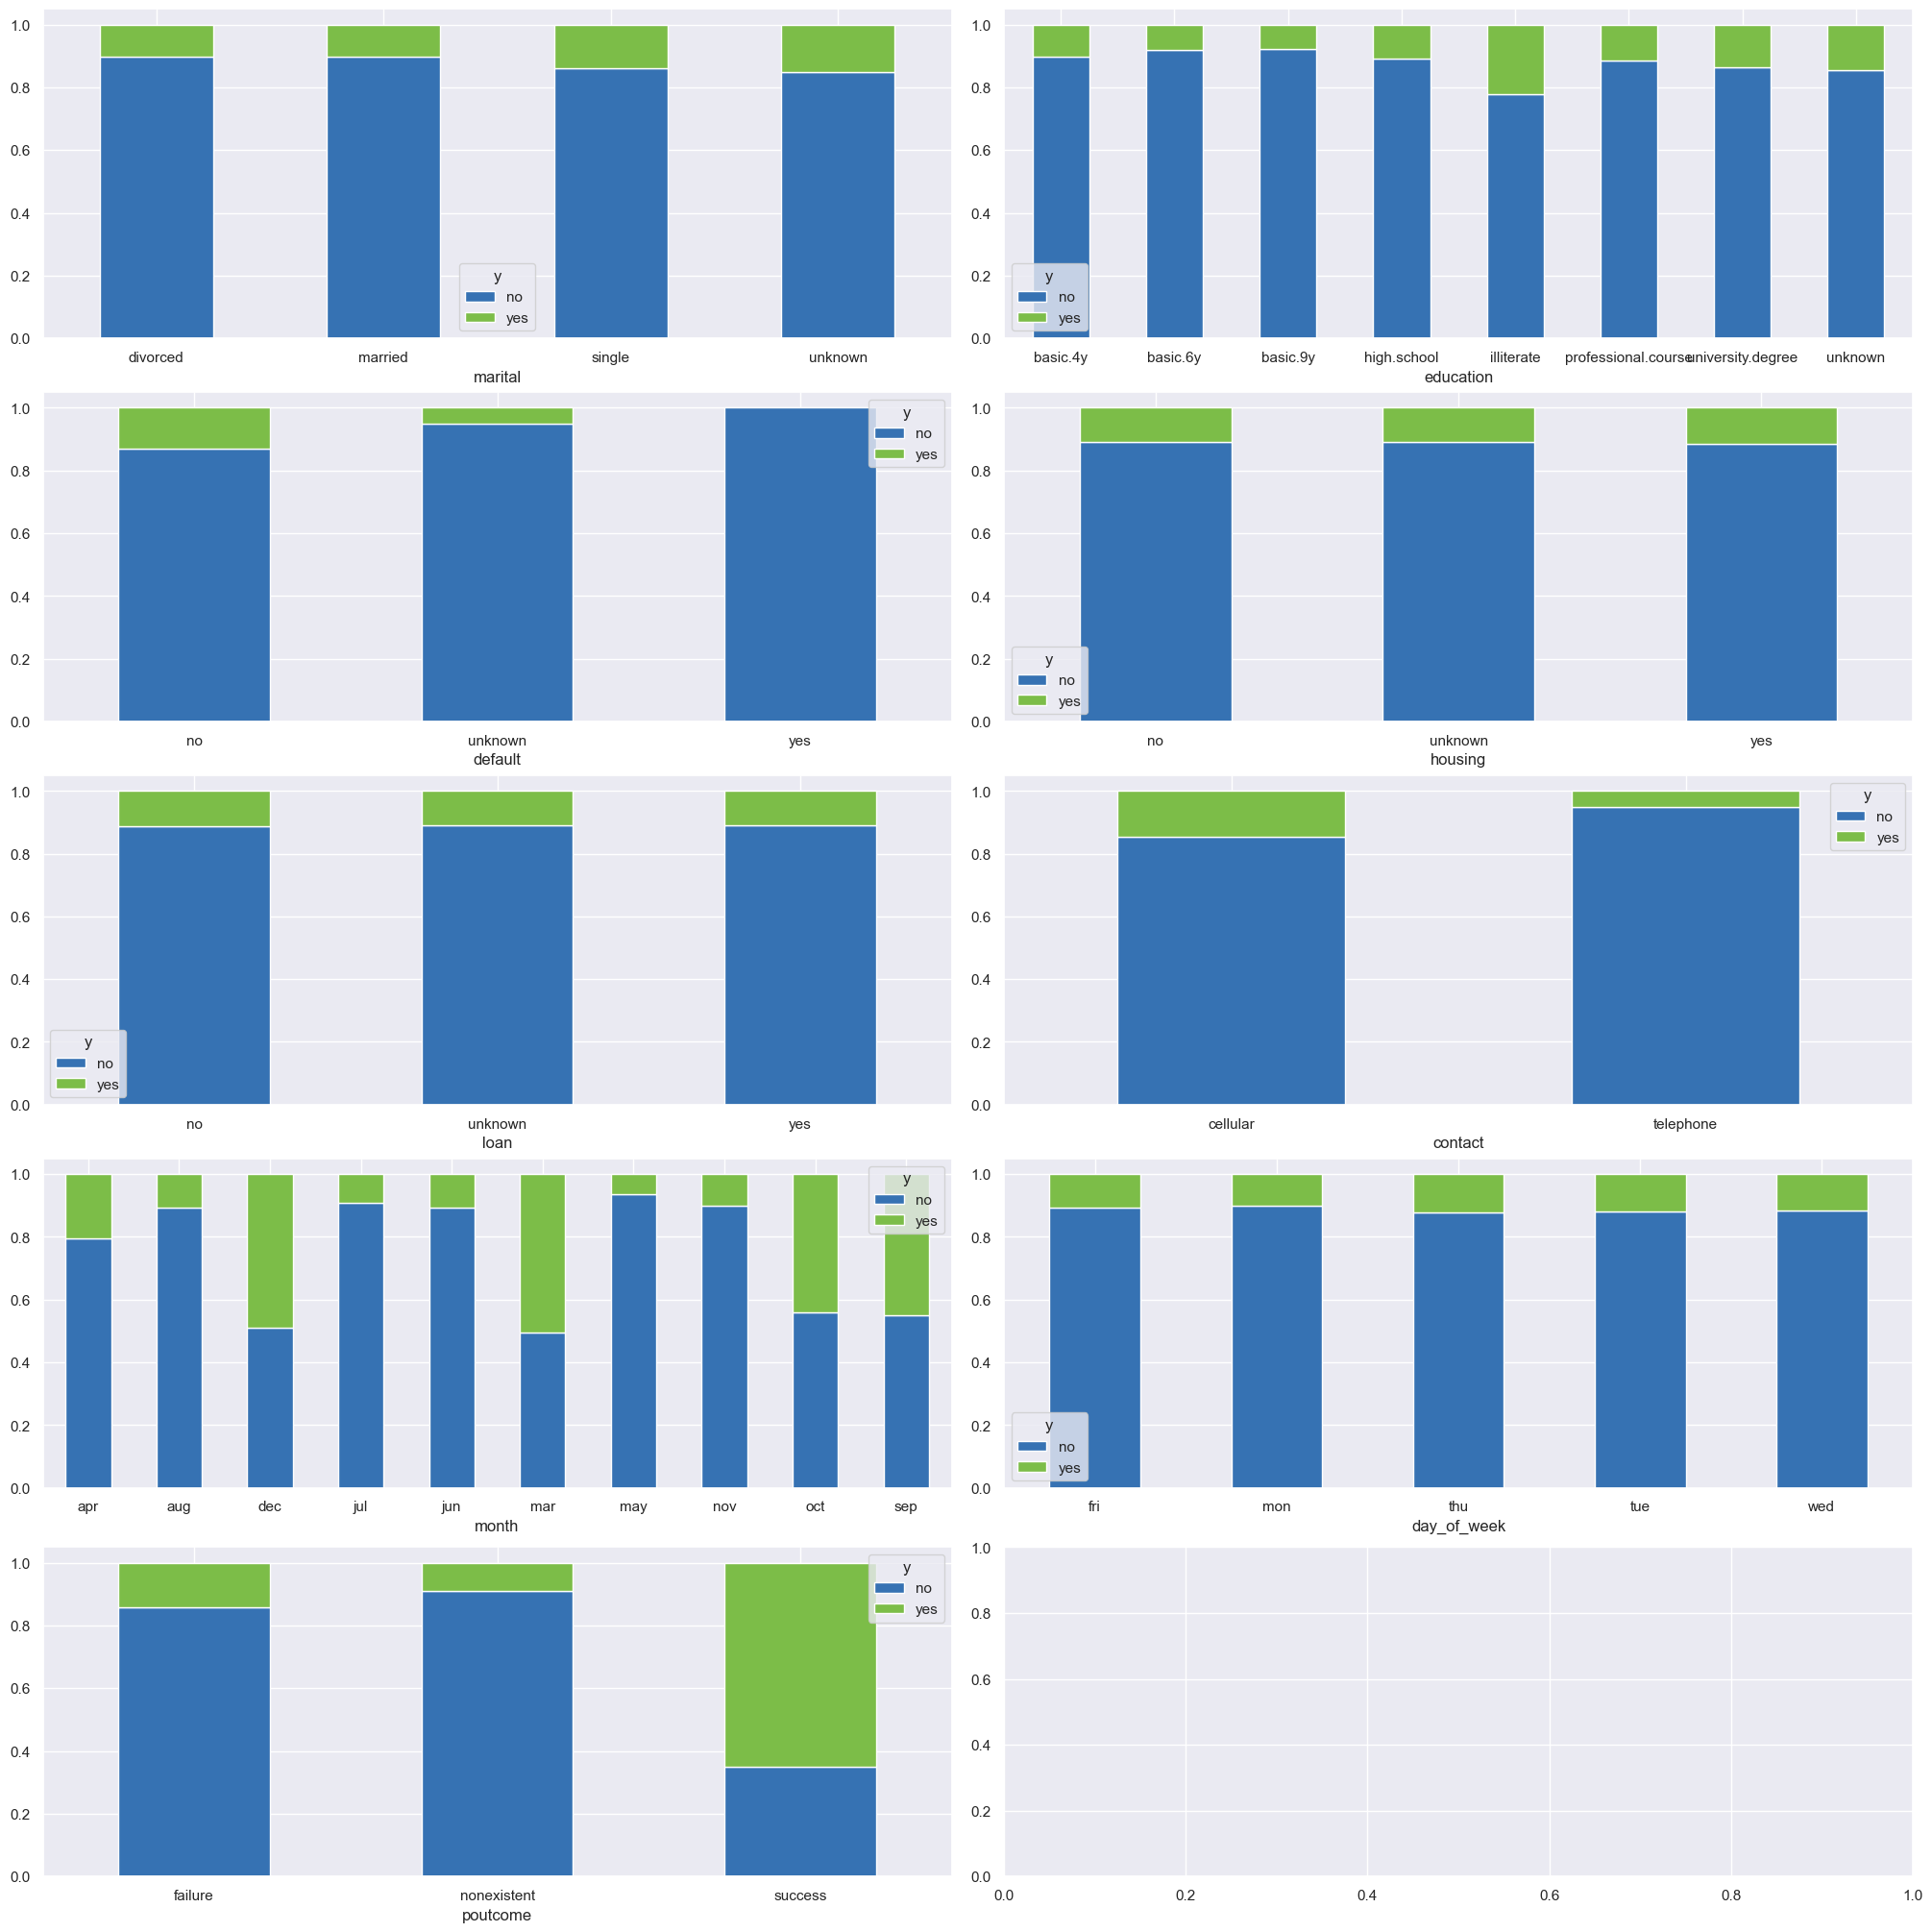

In [16]:
counts = pd.crosstab(df['job'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages.plot.bar(stacked=True, rot=0, figsize=(15, 8),
                     color=['#3672b3', '#7cbd48'])
plt.show()
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
for i, f in enumerate(categorical[1:-1]):
    counts = pd.crosstab(df[f], df['y'])
    percentages = counts.div(counts.sum(1), axis=0)
    percentages.plot.bar(stacked=True, ax=axs[i//2][i % 2], rot=0,
                         color=['#3672b3', '#7cbd48'])
plt.show()

## Šta raditi sa kategoričkim podacima?

1. **job**
    - imputacija unknown (management ili najfrekventnija)
2. **marital**
    - imputacija single (married)
3. **education**
    - izbaci illiterate (ima ih samo 18) ili ih stavi sve na basic.4y
4. **default**
    - izbaci yes
    - prebaci yes u no
    - izbaci celu kolonu (vrv ovo, jer je sve unknown ili no)
5. **housing**
    - imputacija unknown sa yes (najfrekv)
    - prediktivna imputacija (mozda overkill)
    - samo ostavimo i izbacimo nakon one-hot kodiranja
6. **loan**
    - unknown imputacija u no
7. **month**
    - spojimo sep+oct+nov+dec
    - spojimo apr+mart
8. **poutcome**
    - samo ostavimo i izbacimo non-existant iz one-hot


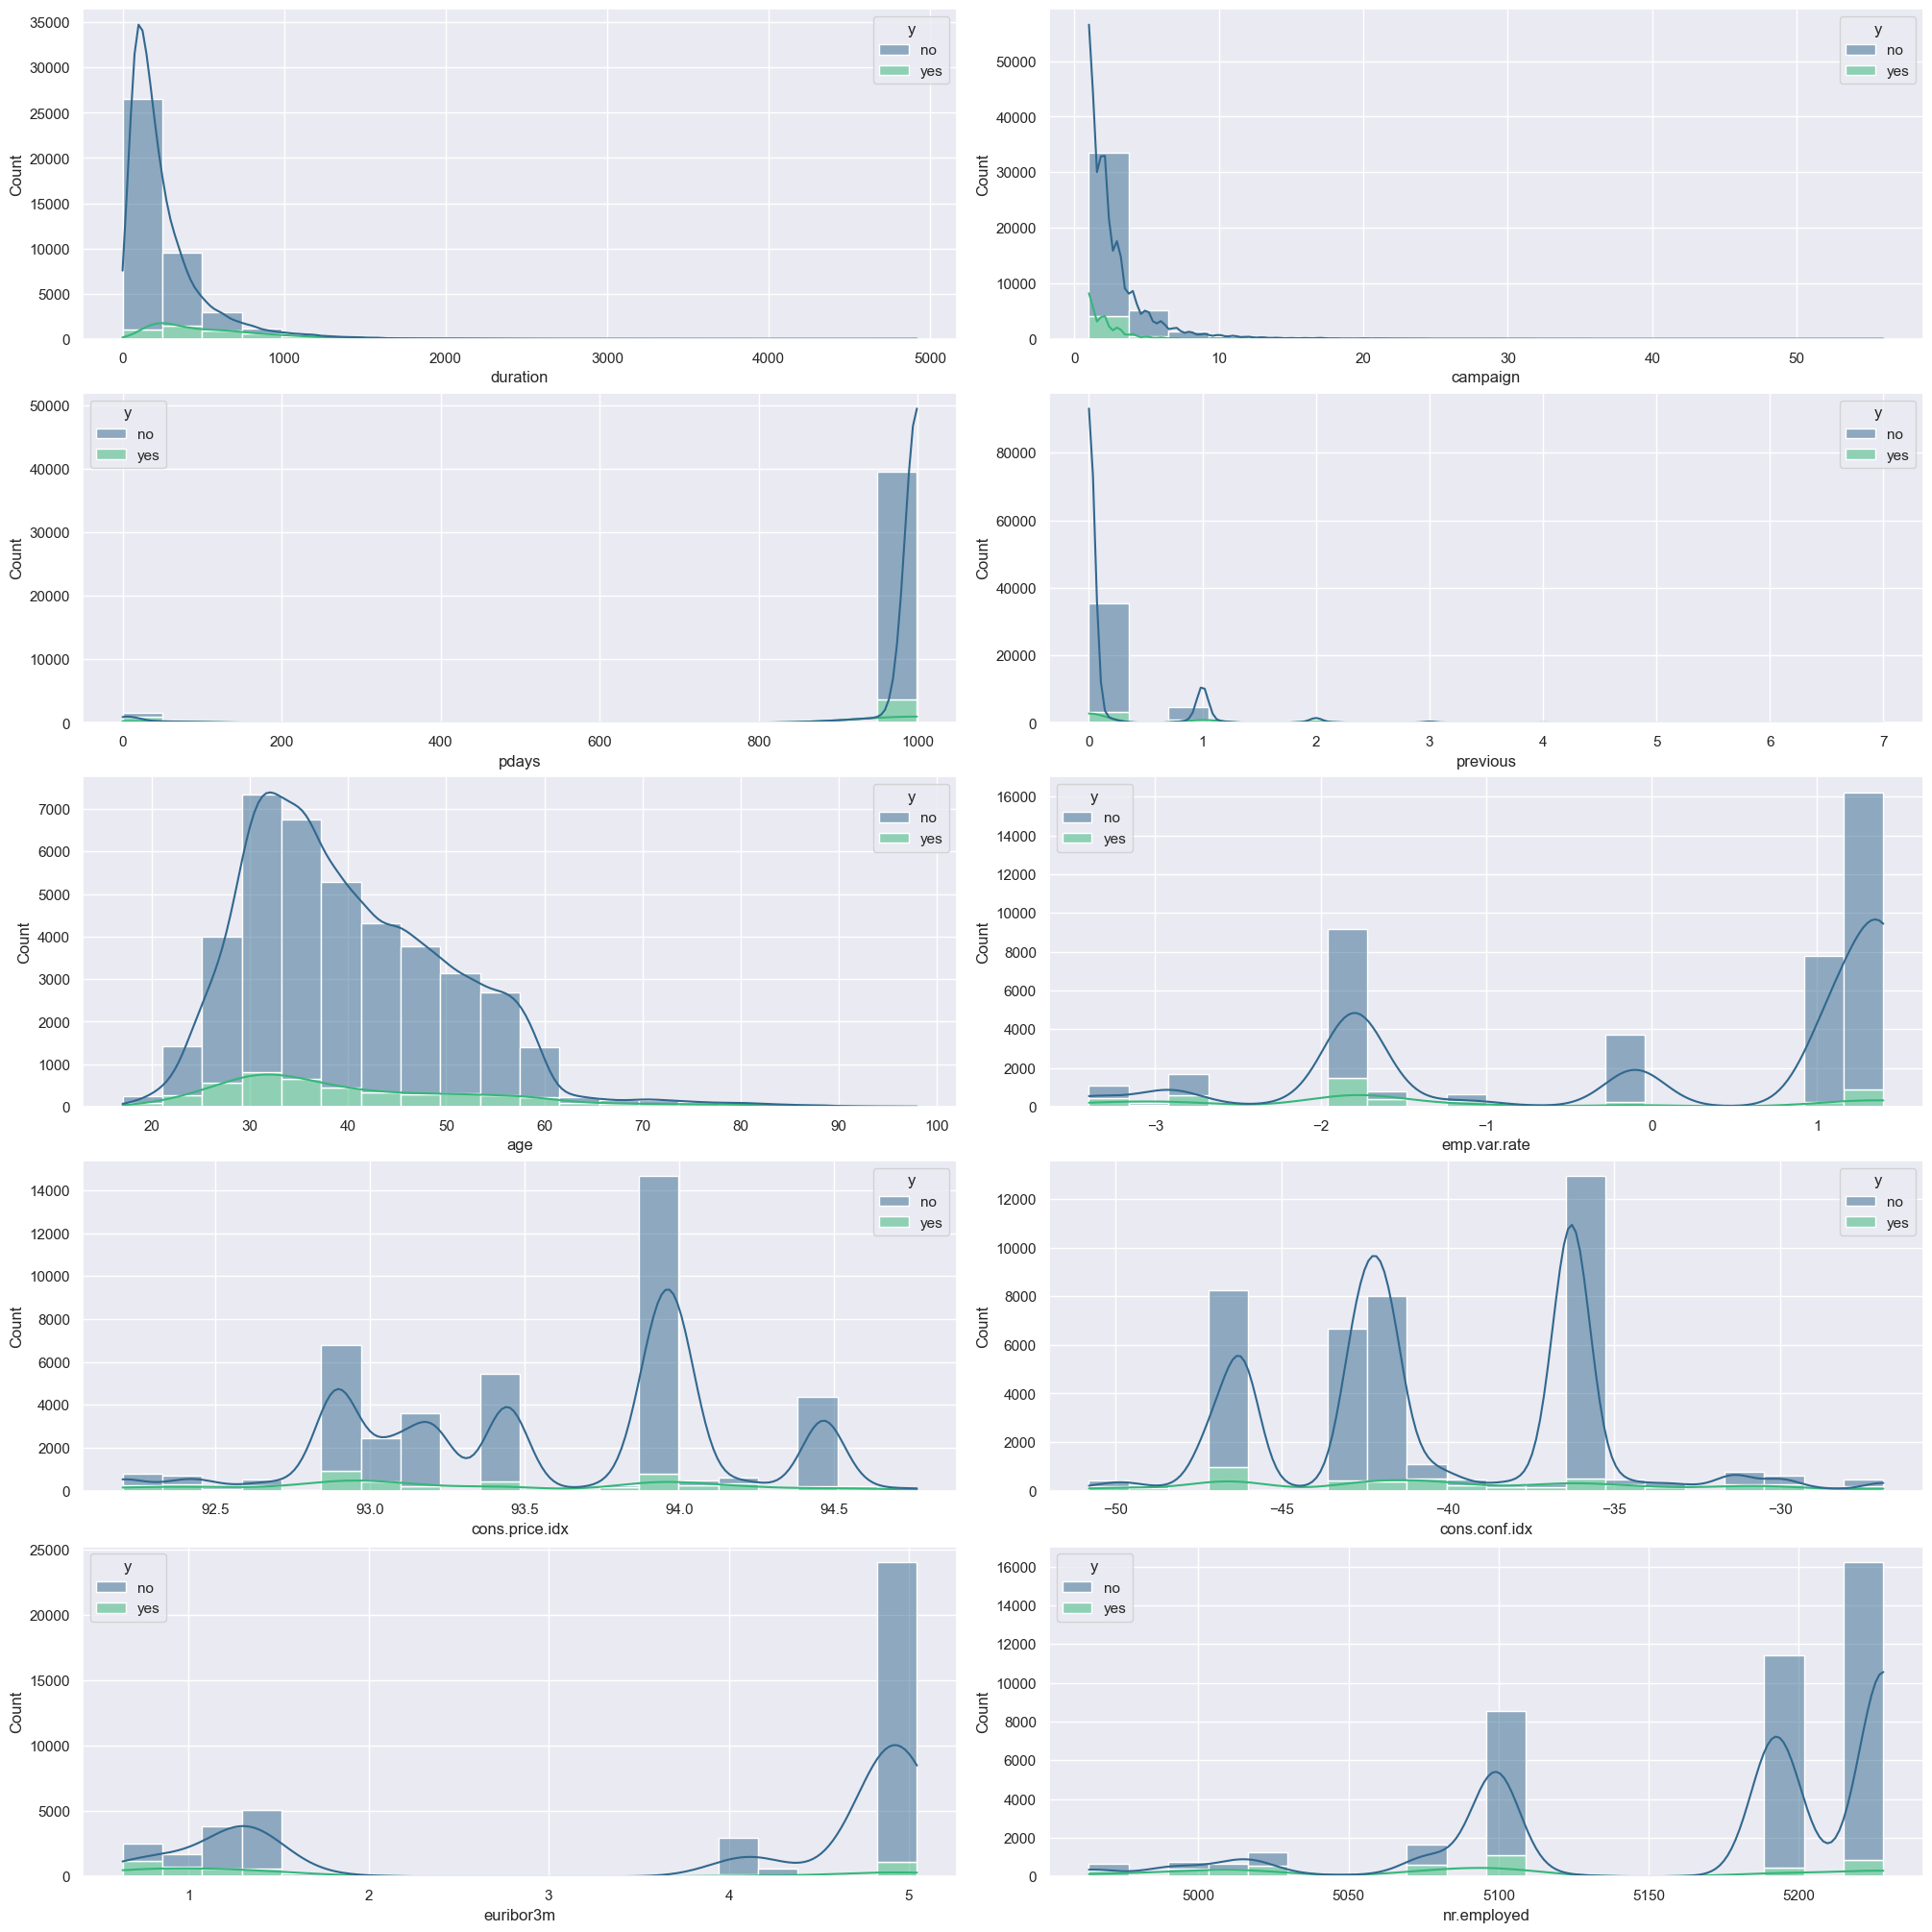

In [17]:
fig, axs = plt.subplots(len(numerical)//2, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df, hue='y', multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))

plt.show()

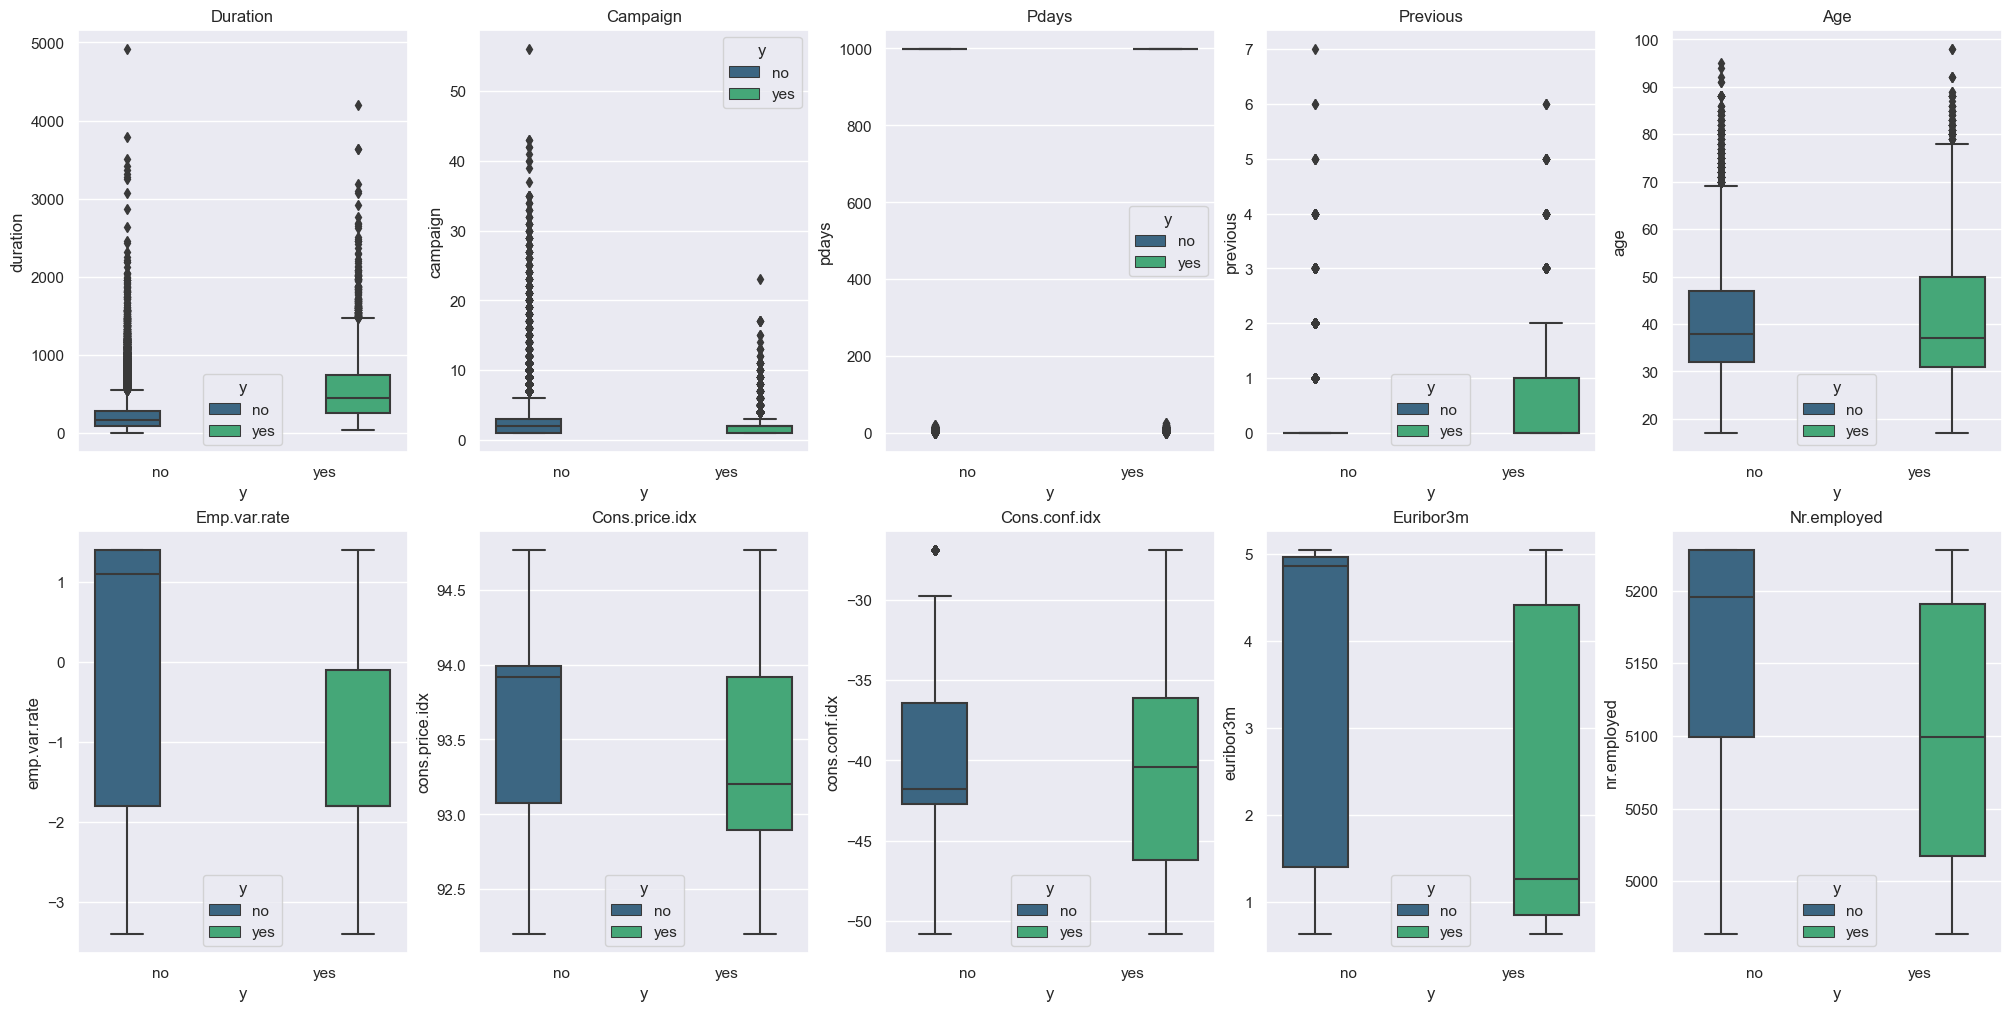

In [18]:
fig, axs = plt.subplots(2, len(numerical)//2,
                        figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f, x='y', data=df, hue='y', ax=axs[i//5][i % 5],
                palette="viridis")
    axs[i//5][i % 5].set_title(f.capitalize())


plt.show()

# Sta raditi sa numerickim kolonama?

1. **campaign**
    - log transform i posle eventualno IQR
2. **age**
    - IQR
3. **duration**
    - log transform pa IQR eventualno
4. **pdays**
    - diskretizuj na 0 i 1 (999 da bude 0 jer to znaci da nije kontaktiran)
5. **previous**
    - diskretizuj na 0 i 1, jer je pramalo ovih koji nisu 0
6. **cons.conf.idx**
    - IQR

-   ostalo ne diramo


## Preprocesiranje


In [19]:
df = df.drop(columns=['default'])  # ok je
# df.loc[df['housing'] == 'unknown', 'housing'] = 'yes'
# df.loc[df['loan'] == 'unknown', 'loan'] = 'no'

In [20]:
# df.loc[df['job'] == 'unknown', 'job'] = 'admin.'
df.loc[df['education'] == 'illiterate', 'education'] = 'basic.4y'  # ok je
# df.loc[df['month'] == 'sep', 'month'] = 'nov'
# df.loc[df['month'] == 'oct', 'month'] = 'nov'
# df.loc[df['month'] == 'dec', 'month'] = 'nov'
# df.loc[df['month'] == 'mar', 'month'] = 'apr'

In [21]:
month_to_quartal = {'jan': 0, 'feb': 0, 'mar': 0,
                    'apr': 1, 'may': 1, 'jun': 1,
                    'jul': 2, 'aug': 2, 'sep': 2,
                    'oct': 3, 'nov': 3, 'dec': 3}

df['year_quartal'] = df['month'].map(month_to_quartal)
df = df.drop('month', axis=1)
print(df['year_quartal'].unique())
df.head()

[1 2 3 0]


,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,56,housemaid,married,basic.4y,no,no,telephone,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,no,no,telephone,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,yes,no,telephone,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,telephone,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,yes,telephone,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [22]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
unknown_job = le.transform(['unknown'])
df['job'] = df['job'].replace(unknown_job, np.nan)

In [23]:
oe = OrdinalEncoder(categories=[['unknown', 'basic.4y', 'basic.6y', 'basic.9y',
                    'high.school', 'professional.course', 'university.degree']])
df['education'] = oe.fit_transform(df['education'].values.reshape(-1, 1))
unknown_education = oe.transform([['unknown']])
df['education'] = df['education'].replace(unknown_education, np.nan)

In [24]:
df['housing'] = df['housing'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['marital'] = df['marital'].map(
    {'unknown': np.nan, 'married': 1, 'single': 0})
df['contact'] = df['contact'].map({'cellular': 1, 'telephone': 0})

In [25]:
df.head()

,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,56,3.0,1.0,1.0,0.0,0.0,0,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,7.0,1.0,4.0,0.0,0.0,0,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,7.0,1.0,4.0,1.0,0.0,0,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,0.0,1.0,2.0,0.0,0.0,0,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,7.0,1.0,4.0,0.0,1.0,0,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


In [26]:
def remove_outliers_standard_deviation(df, features, n) -> pd.DataFrame:
    outlier_list = []

    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()
        cut_off = data_std * 3

        outlier_list_column = df[(
            df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outlier_list.extend(outlier_list_column)

    return outlier_list

In [27]:
def remove_outliers_iqr(df, features) -> pd.DataFrame:

    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)

        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(
            df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        outlier_list.extend(outlier_list_column)

    return outlier_list

In [28]:
def remove_outliers_isolation_forest(df, contamination='auto') -> pd.DataFrame:
    clf = IsolationForest(random_state=42, contamination=contamination)
    clf.fit(df)
    y_pred = clf.predict(df)
    outlier_list = df[y_pred == -1].index
    return outlier_list

In [29]:
def log_transform(df, column_name):
    minimum = df[column_name].min()
    df[column_name] = df[column_name]-minimum+1
    df[column_name] = np.log(df[column_name])

In [30]:
for column in ['campaign', 'duration']:
    log_transform(df, column)

In [31]:
df['pdays'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
df['previous'] = df['previous'].apply(lambda x: 0 if x < 0.5 else 1)

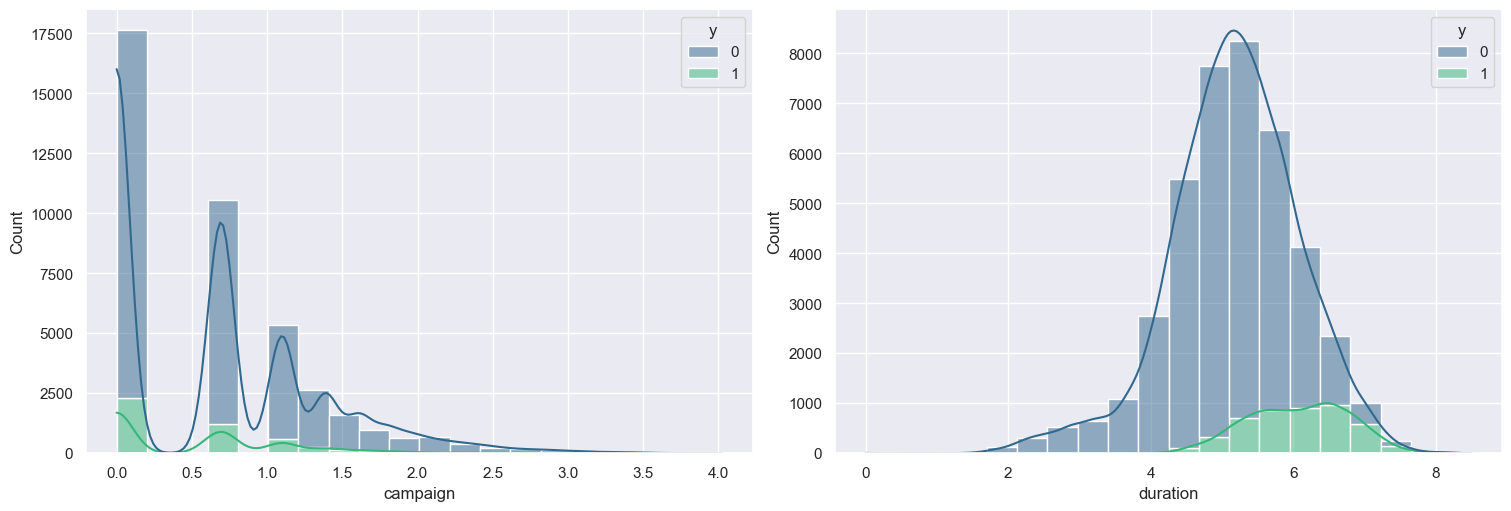

In [32]:
fig, axs = plt.subplots(1, 2,
                        figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration']):
    sns.histplot(x=f, data=df, hue='y', multiple='stack',
                 ax=axs[i], bins=20, palette='viridis', kde=True)
plt.show()

In [33]:
# print(f"Pre izbacivanja: {df.shape}")
# outliers = remove_outliers_iqr(  # proveriti
#     df, ['previous', 'campaign', 'duration', 'pdays'])
# df = df.drop(outliers, axis=0).reset_index(drop=True)
# print(f"Nakon izbacivanja: {df.shape}")
# print(f"Outliers: {len(outliers)}")
# da li izbaciti previous i pdays?

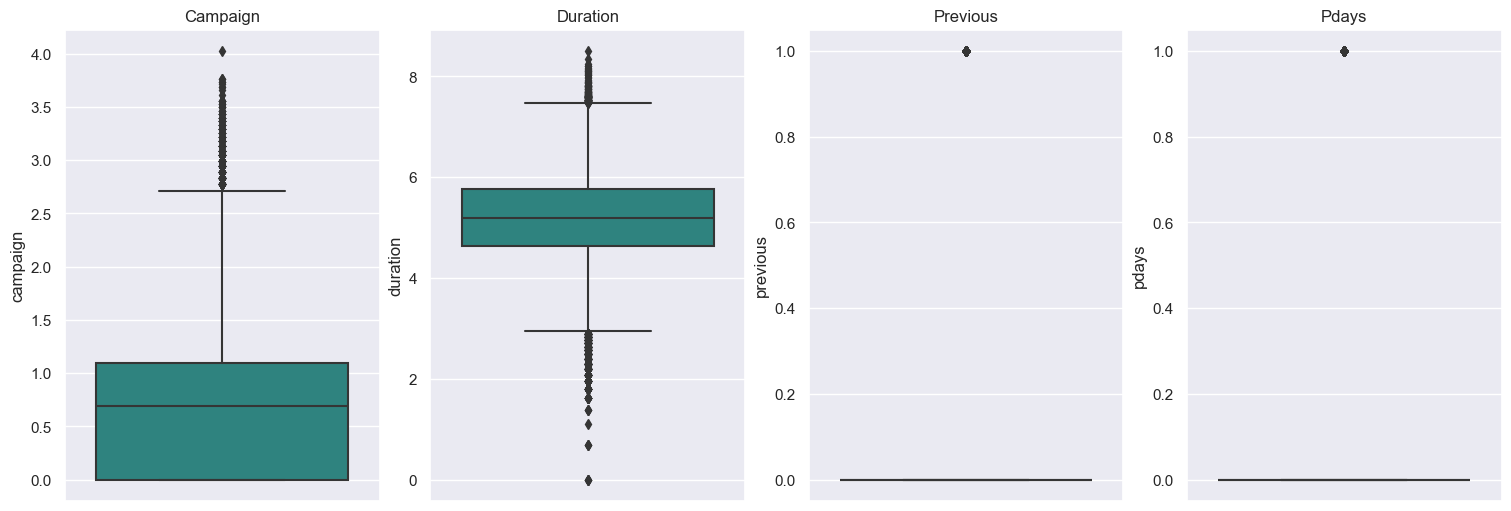

In [34]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration', 'previous', 'pdays']):
    sns.boxplot(y=f, data=df, hue='y', ax=axs[i], palette='viridis')
    axs[i].set_title(f.capitalize())
plt.show()

In [35]:
# pametniji nacin za age
kbins_discretizer = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='quantile')
df['age'] = kbins_discretizer.fit_transform(df[['age']])
age_bins = list(pairwise(kbins_discretizer.bin_edges_[0].tolist()))
print(age_bins)  # use for labeling later
df.head()

[(17.0, 31.0), (31.0, 35.0), (35.0, 41.0), (41.0, 49.0), (49.0, 98.0)]


,age,job,marital,education,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
0,4.0,3.0,1.0,1.0,0.0,0.0,0,mon,5.568345,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,4.0,7.0,1.0,4.0,0.0,0.0,0,mon,5.010635,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,2.0,7.0,1.0,4.0,1.0,0.0,0,mon,5.424950,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,2.0,0.0,1.0,2.0,0.0,0.0,0,mon,5.023881,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,4.0,7.0,1.0,4.0,0.0,1.0,0,mon,5.730100,0.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


In [36]:
df.describe()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year_quartal
count,41164.000000,40834.000000,36474.000000,39435.000000,40174.000000,40174.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000
mean,2.101375,3.664985,0.683062,4.161024,0.536815,0.155523,0.634681,5.173239,0.650007,0.036804,0.136649,0.081958,93.575775,-40.503127,3.621296,5167.033828,0.112671,1.567389
std,1.398806,3.548589,0.465289,1.638018,0.498649,0.362407,0.481525,0.917023,0.692429,0.188283,0.343480,1.570805,0.578838,4.627522,1.734427,72.251200,0.316194,0.717485
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.634729,0.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,1.000000
50%,2.000000,2.000000,1.000000,4.000000,1.000000,0.000000,1.000000,5.198497,0.693147,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000
75%,3.000000,7.000000,1.000000,6.000000,1.000000,0.000000,1.000000,5.768321,1.098612,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,2.000000
max,4.000000,10.000000,1.000000,6.000000,1.000000,1.000000,1.000000,8.500861,4.025352,1.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,3.000000


In [37]:
df = pd.get_dummies(
    data=df, columns=['day_of_week', 'poutcome']).astype('float64')


df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,...,y,year_quartal,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,5.568345,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,7.0,1.0,4.0,0.0,0.0,0.0,5.010635,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,7.0,1.0,4.0,1.0,0.0,0.0,5.424950,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,1.0,2.0,0.0,0.0,0.0,5.023881,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,7.0,1.0,4.0,0.0,1.0,0.0,5.730100,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
imputer = KNNImputer(n_neighbors=1, missing_values=np.nan)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,...,y,year_quartal,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,5.568345,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.0,7.0,1.0,4.0,0.0,0.0,0.0,5.010635,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,7.0,1.0,4.0,1.0,0.0,0.0,5.424950,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,1.0,2.0,0.0,0.0,0.0,5.023881,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,7.0,1.0,4.0,0.0,1.0,0.0,5.730100,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
df['job'] = le.inverse_transform(df['job'].astype(int))
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [40]:
df['education'].unique()

array([1., 4., 2., 3., 5., 6.])

In [41]:
df = pd.get_dummies(
    data=df, columns=['job', 'age', 'year_quartal']).astype('float64')

df.head()

,marital,education,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,job_unemployed,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0,year_quartal_0.0,year_quartal_1.0,year_quartal_2.0,year_quartal_3.0
0,1.0,1.0,0.0,0.0,0.0,5.568345,0.0,0.0,0.0,1.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0,5.010635,0.0,0.0,0.0,1.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,4.0,1.0,0.0,0.0,5.424950,0.0,0.0,0.0,1.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,5.023881,0.0,0.0,0.0,1.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,4.0,0.0,1.0,0.0,5.730100,0.0,0.0,0.0,1.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [42]:
df = df.drop(columns=['poutcome_nonexistent'])

In [43]:
outliers = remove_outliers_isolation_forest(df, contamination=0.1)
df = df.drop(outliers, axis=0).reset_index(drop=True)

<Axes: >

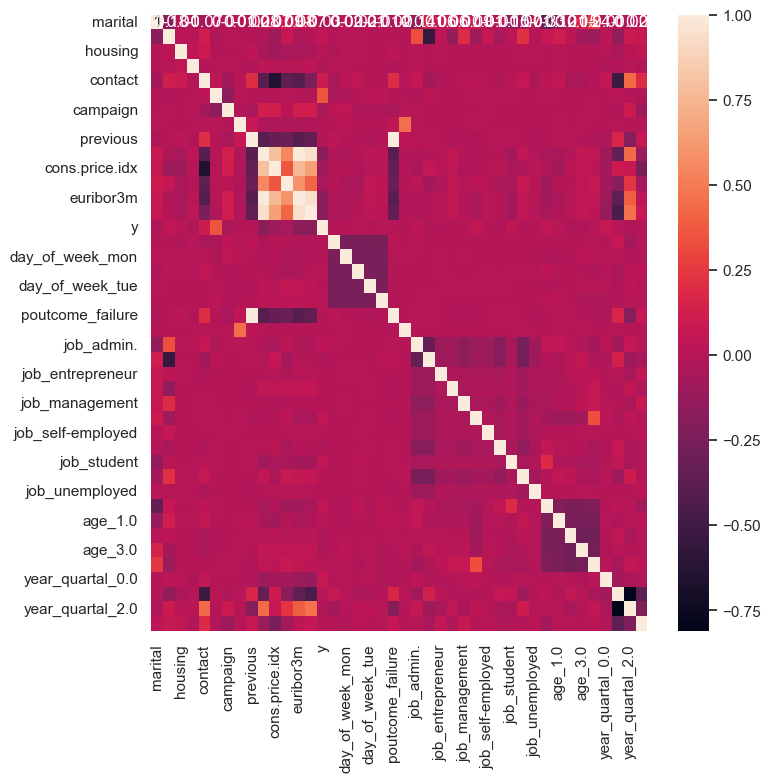

In [44]:
numeric = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric].corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=True, ax=ax)

In [45]:
df.dtypes

marital              float64
education            float64
housing              float64
loan                 float64
contact              float64
duration             float64
campaign             float64
pdays                float64
previous             float64
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
y                    float64
day_of_week_fri      float64
day_of_week_mon      float64
day_of_week_thu      float64
day_of_week_tue      float64
day_of_week_wed      float64
poutcome_failure     float64
poutcome_success     float64
job_admin.           float64
job_blue-collar      float64
job_entrepreneur     float64
job_housemaid        float64
job_management       float64
job_retired          float64
job_self-employed    float64
job_services         float64
job_student          float64
job_technician       float64
job_unemployed       float64
age_0.0              float64
age_1.0       

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37047 entries, 0 to 37046
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marital            37047 non-null  float64
 1   education          37047 non-null  float64
 2   housing            37047 non-null  float64
 3   loan               37047 non-null  float64
 4   contact            37047 non-null  float64
 5   duration           37047 non-null  float64
 6   campaign           37047 non-null  float64
 7   pdays              37047 non-null  float64
 8   previous           37047 non-null  float64
 9   emp.var.rate       37047 non-null  float64
 10  cons.price.idx     37047 non-null  float64
 11  cons.conf.idx      37047 non-null  float64
 12  euribor3m          37047 non-null  float64
 13  nr.employed        37047 non-null  float64
 14  y                  37047 non-null  float64
 15  day_of_week_fri    37047 non-null  float64
 16  day_of_week_mon    370

In [47]:
# probaj i norm i std
scaler = Normalizer()
cols_to_scale = ['duration',
                 'campaign', 'emp.var.rate',	'cons.price.idx',	'cons.conf.idx']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,marital,education,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,job_unemployed,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0,year_quartal_0.0,year_quartal_1.0,year_quartal_2.0,year_quartal_3.0
0,1.0,1.0,0.0,0.0,0.0,0.055156,0.0,0.0,0.0,0.010896,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0,0.049646,0.0,0.0,0.0,0.010899,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,4.0,1.0,0.0,0.0,0.053740,0.0,0.0,0.0,0.010897,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,0.049777,0.0,0.0,0.0,0.010899,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,4.0,0.0,1.0,0.0,0.056753,0.0,0.0,0.0,0.010895,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<Axes: >

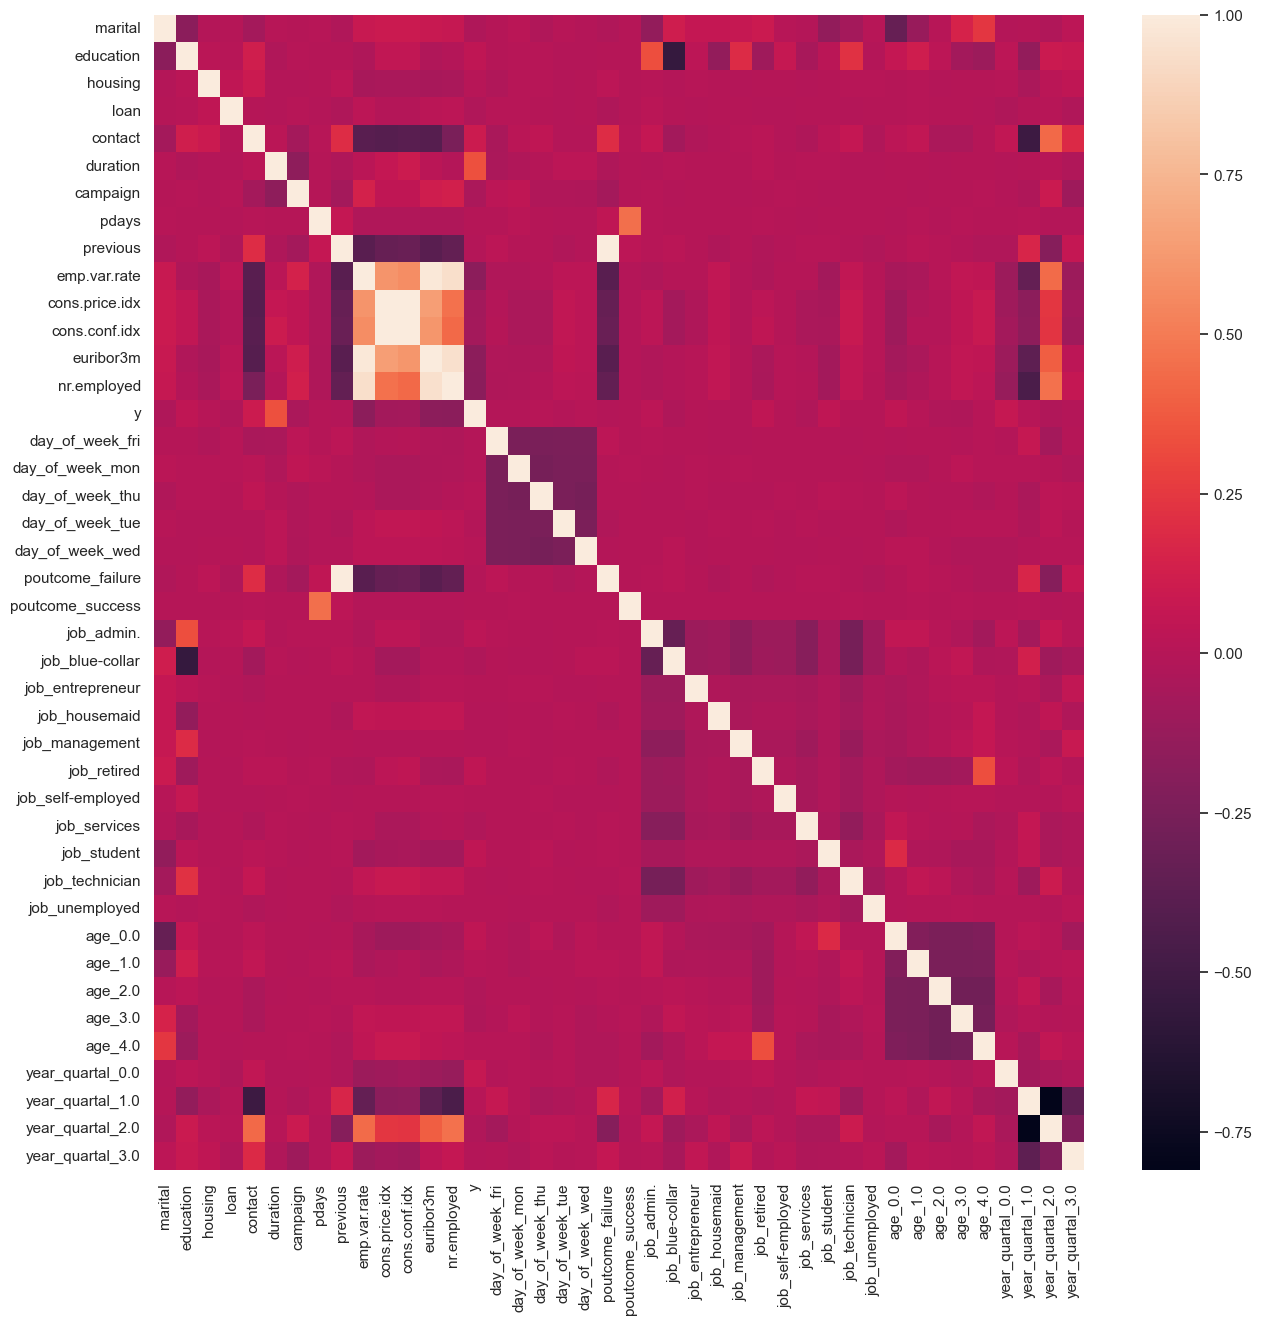

In [48]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, annot=False, ax=ax)

## Isprobavanje modela


In [49]:
# Train test split
X = df.drop('y', axis=1)
y = df['y']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm", "F1", "AUC", "Accuracy"])

<Axes: xlabel='y', ylabel='count'>

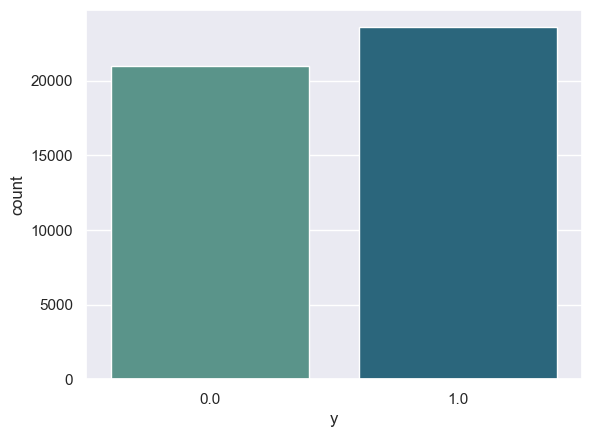

In [51]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
sns.countplot(x=y_resampled, palette=sns.color_palette("crest", 2))

In [52]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap_base = 'inferno'
vmin, vmax = 0.4, 0.9
cmap = truncate_colormap(cmap_base, vmin, vmax)

In [53]:
def test_models(classifiers, X_train, X_test, y_train, y_test, results):
    sns.set_palette('hls')
    confusion_matrix_fig, confusion_matrix_ax =\
        plt.subplots(1, len(classifiers), figsize=(
            15, 4), constrained_layout=True,)
    all_curves_fig, all_curves_ax = plt.subplots(figsize=(10, 10))
    for i, name in enumerate(classifiers):
        classifier = classifiers[name]
        classifier.fit(X_train, y_train)

        if hasattr(classifier, 'predict_proba'):
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        elif hasattr(classifier, 'decision_function'):
            decision_function = classifier.decision_function(X_test)
            y_pred_prob = 1 / (1 + np.exp(-decision_function))
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        print(name+':DONE', end='; ')

        pred = classifier.predict(X_test)
        f1 = f1_score(y_test, pred)
        acc = accuracy_score(y_test, pred)

        row = {'Algorithm': name, 'F1': f1, 'AUC': roc_auc, 'Accuracy': acc}
        results = pd.concat([pd.DataFrame([row]), results], ignore_index=True)

        all_curves_ax.plot(fpr, tpr, lw=2,
                           label=f'{name} (AUC = {roc_auc:.2f})')

        cm = confusion_matrix(y_test, pred)
        ConfusionMatrixDisplay(cm).plot(
            ax=confusion_matrix_ax[i], colorbar=False, cmap=cmap)
        confusion_matrix_ax[i].grid(False)
        confusion_matrix_ax[i].set_title(name)

    all_curves_ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    all_curves_ax.set_title('All ROC Curves')
    all_curves_ax.set_xlabel('False Positive Rate')
    all_curves_ax.set_ylabel('True Positive Rate')
    all_curves_ax.legend(loc='lower right')
    all_curves_fig.show()
    confusion_matrix_fig.show()
    results.sort_values(by='AUC', ascending=False)
    return results

Random Forest:DONE; AdaBoost:DONE; Bagging:DONE; Logistic Regression:DONE; Ridge:DONE; 

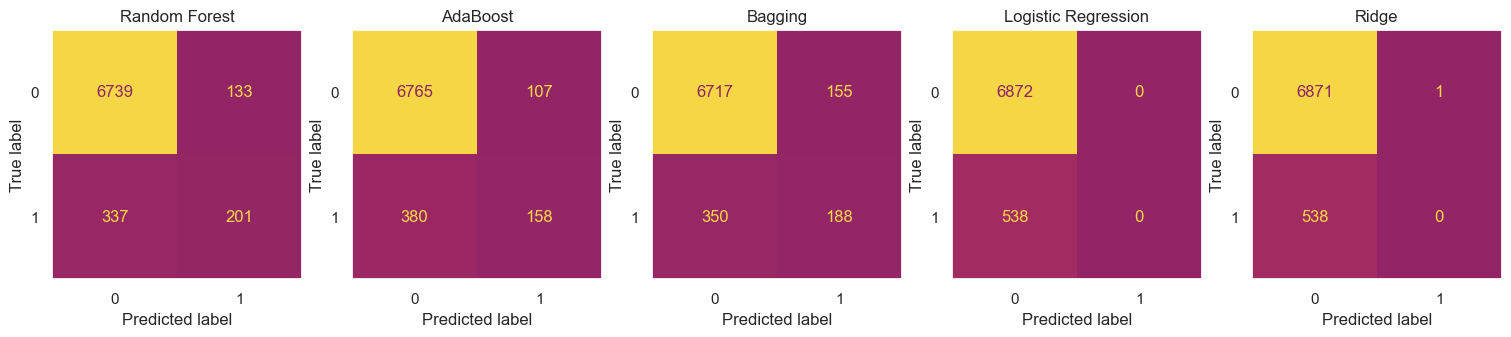

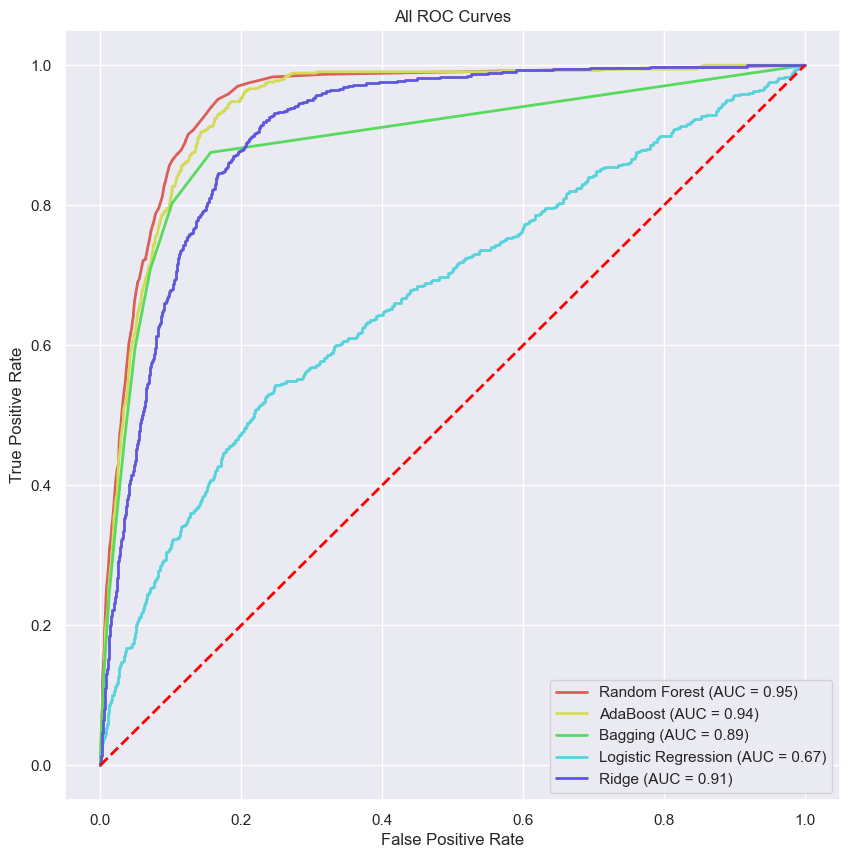

In [54]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Ridge': RidgeClassifier(),
}
results = test_models(classifiers, X_train, X_test, y_train, y_test, results)

Random Forest (balanced):DONE; AdaBoost (balanced):DONE; Bagging (balanced):DONE; Logistic Regression (balanced):DONE; Ridge (balanced):DONE; 

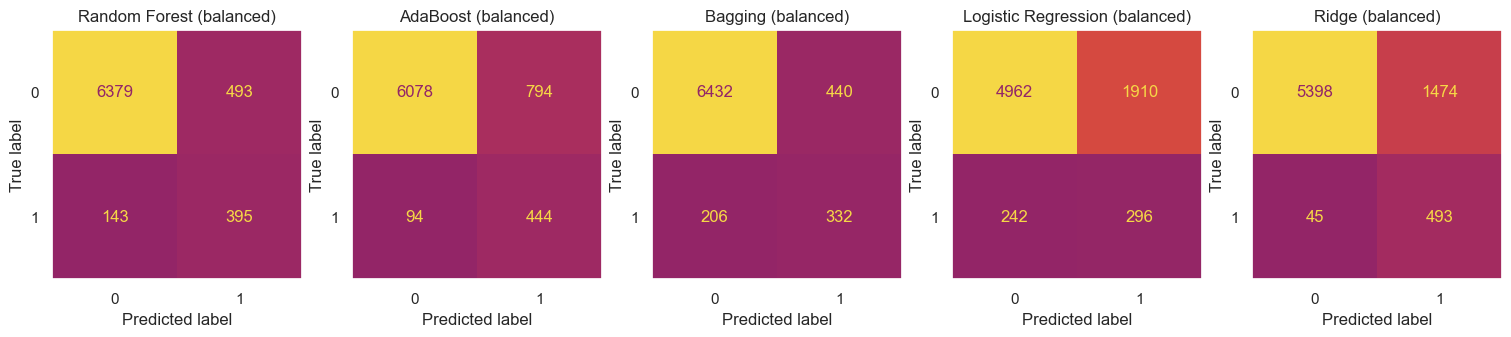

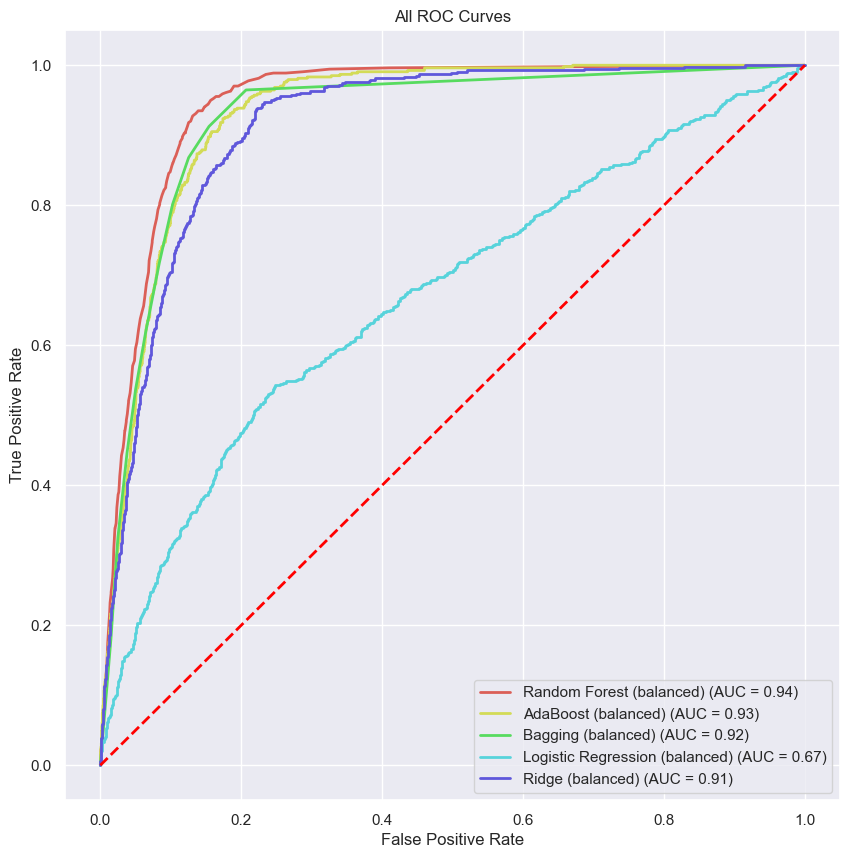

In [55]:
classifiers_balanced = {
    'Random Forest (balanced)': RandomForestClassifier(),
    'AdaBoost (balanced)': AdaBoostClassifier(),
    'Bagging (balanced)': BaggingClassifier(),
    'Logistic Regression (balanced)': LogisticRegression(),
    'Ridge (balanced)': RidgeClassifier(),
}
results = test_models(classifiers_balanced, X_resampled,
                      X_test, y_resampled, y_test, results)

In [56]:
results.sort_values(by='F1', ascending=False)

,Algorithm,F1,AUC,Accuracy
4,Random Forest (balanced),0.553997,0.944840,0.914170
2,Bagging (balanced),0.506870,0.923653,0.912821
3,AdaBoost (balanced),0.500000,0.930204,0.880162
9,Random Forest,0.461009,0.945487,0.936572
7,Bagging,0.426788,0.891770,0.931849
0,Ridge (balanced),0.393613,0.914238,0.795007
8,AdaBoost,0.393524,0.939325,0.934278
1,Logistic Regression (balanced),0.215743,0.669652,0.709582
5,Ridge,0.000000,0.906480,0.927260
6,Logistic Regression,0.000000,0.670687,0.927395
